首先读取数据

In [113]:
import pickle
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
plt.rcParams['font.family'] = ['Simhei']  # 中文显示

设置相应的超参数

In [114]:
d1,d2=2500,2500
w1,w2=40,40


window_size = 100  # 窗口大小,导致线平缓度
poly_order = 4    # 多项式阶数

In [115]:

#由你的电脑的屏幕大小来决定
screen_width,screen_height=3072,1920

#print(screen_wide,screen_high  )

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(d1,d2,w1,w2)

In [116]:

'''T_all=[]
X_all=[]
Y_all=[]
for k in range(len(mouse_move)):
    T=[]
    X=[]
    Y=[]
    for i in range(len(mouse_move[k])):
        #print(len(mouse_move))
        T.append(mouse_move[k][i][0]-mouse_move[k][0][0])
        X.append(mouse_move[k][i][1])
        Y.append(mouse_move[k][i][2])   

    # 使用Savitzky-Golay滤波器平滑数据
    
    T_smoothed = T#savgol_filter(T, window_size, poly_order)
    X_smoothed = X#savgol_filter(X, window_size, poly_order)
    Y_smoothed = Y#savgol_filter(Y, window_size, poly_order)
    T_all.append(T_smoothed)
    X_all.append(X_smoothed)
    Y_all.append(Y_smoothed)'''


'T_all=[]\nX_all=[]\nY_all=[]\nfor k in range(len(mouse_move)):\n    T=[]\n    X=[]\n    Y=[]\n    for i in range(len(mouse_move[k])):\n        #print(len(mouse_move))\n        T.append(mouse_move[k][i][0]-mouse_move[k][0][0])\n        X.append(mouse_move[k][i][1])\n        Y.append(mouse_move[k][i][2])   \n\n    # 使用Savitzky-Golay滤波器平滑数据\n    \n    T_smoothed = T#savgol_filter(T, window_size, poly_order)\n    X_smoothed = X#savgol_filter(X, window_size, poly_order)\n    Y_smoothed = Y#savgol_filter(Y, window_size, poly_order)\n    T_all.append(T_smoothed)\n    X_all.append(X_smoothed)\n    Y_all.append(Y_smoothed)'

In [117]:
T=[]
X=[]
Y=[]
for k in range(len(mouse_move)):
    t=[]
    x=[]
    y=[]
    for i in range(len(mouse_move[k])):
        #print(mouse_move[0][i])
        t.append(mouse_move[k][i][0]-mouse_move[k][0][0])
        x.append(mouse_move[k][i][1])
        y.append(mouse_move[k][i][2])   
    T.append(t)
    X.append(x)
    Y.append(y)

In [118]:

S=[]

for i in range(len(T)):
    l=0
    s=[0,]#点在轨迹上的位置
    for j in range(1,len(T[i])):
        l+=np.sqrt((X[i][j]-X[i][j-1])**2+(Y[i][j]-Y[i][j-1])**2)
        s.append(l)
    S.append(s)



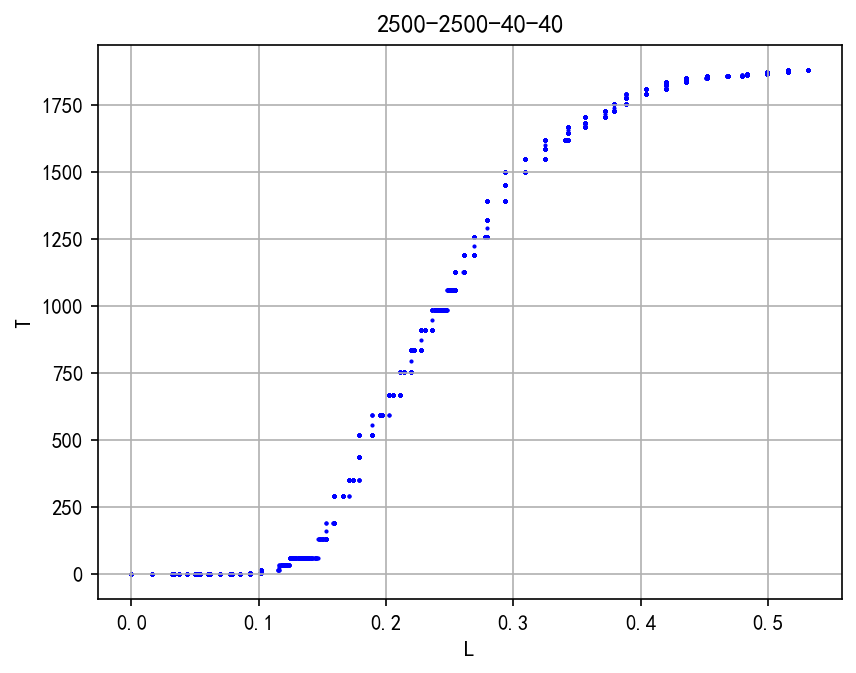

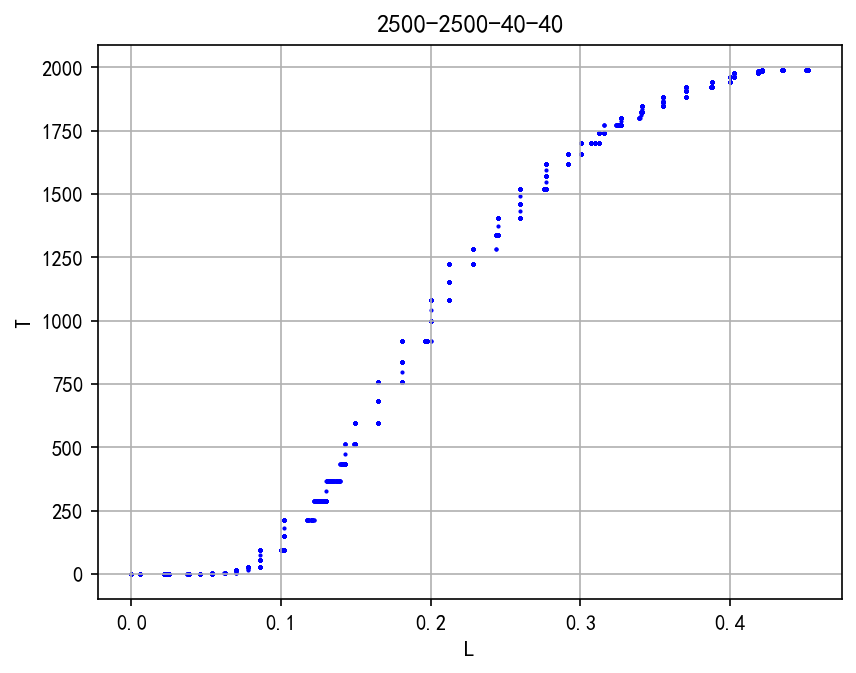

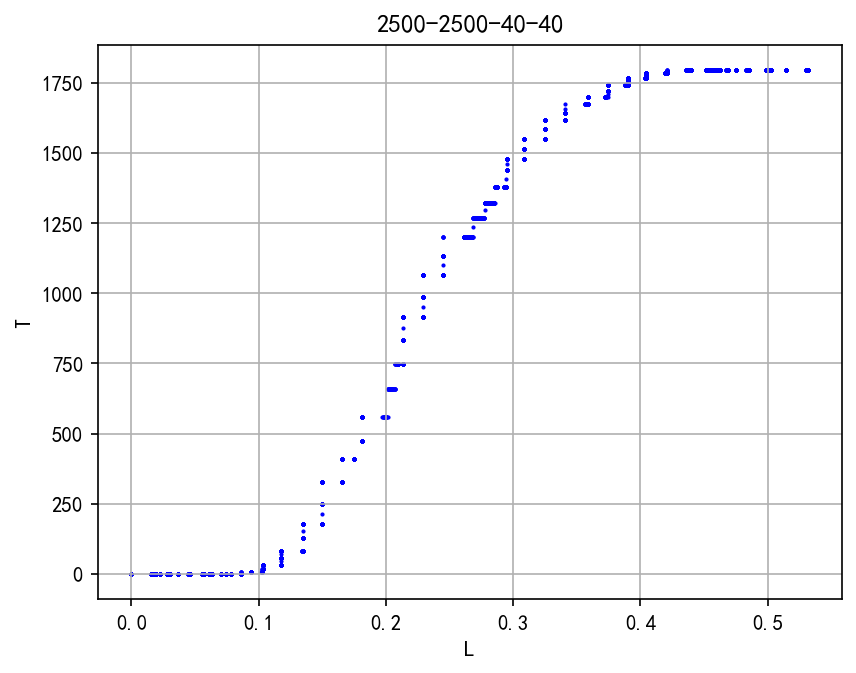

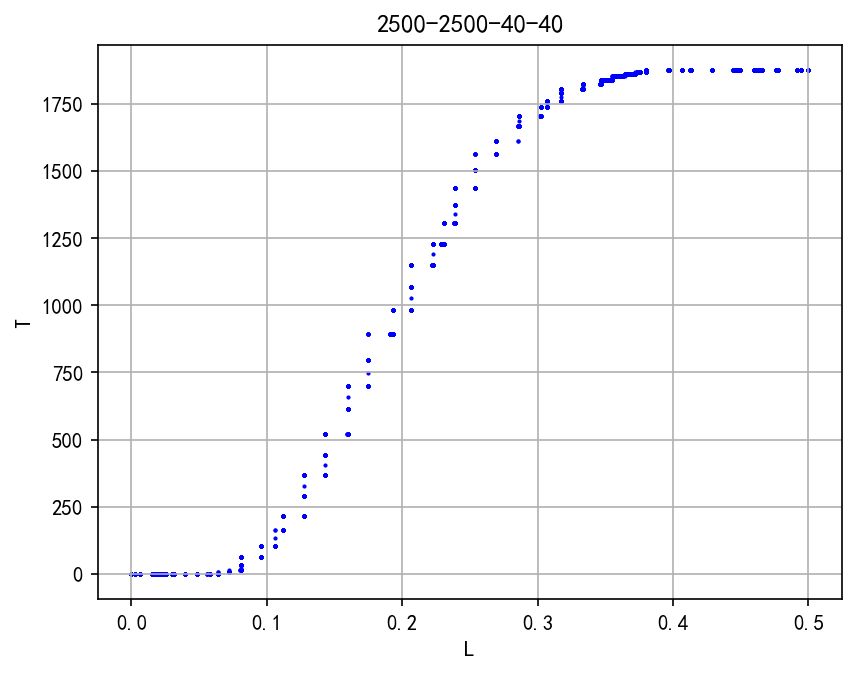

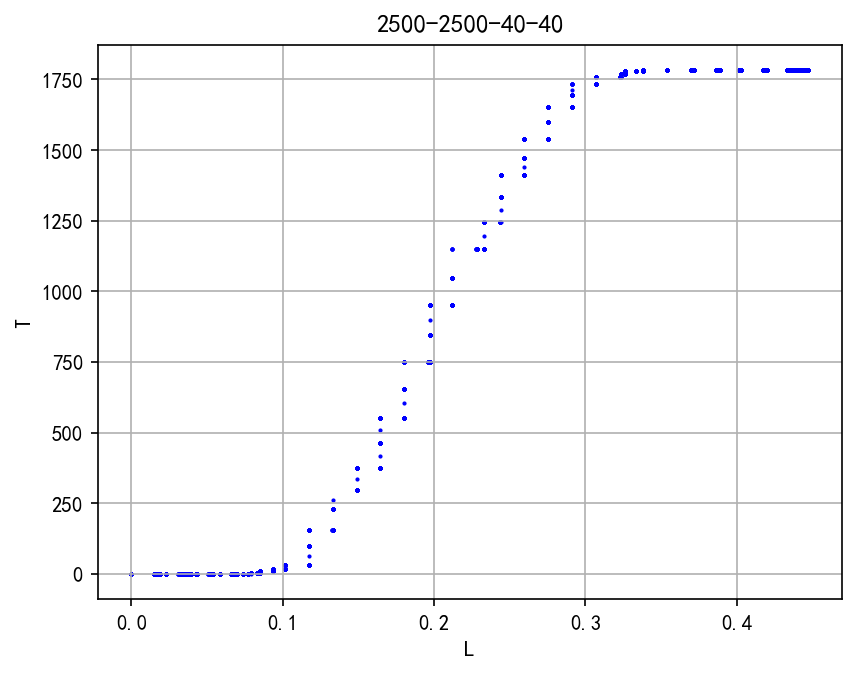

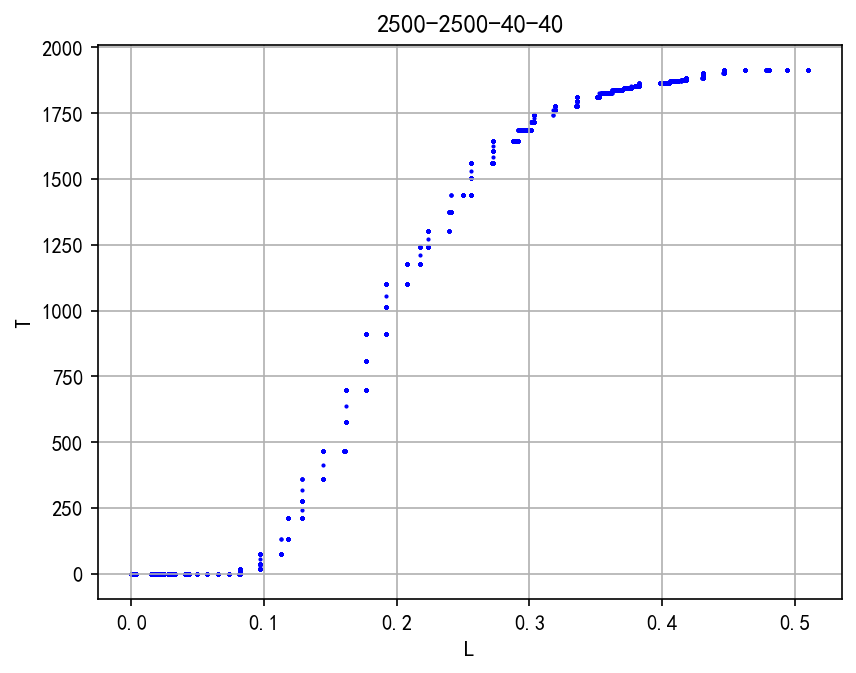

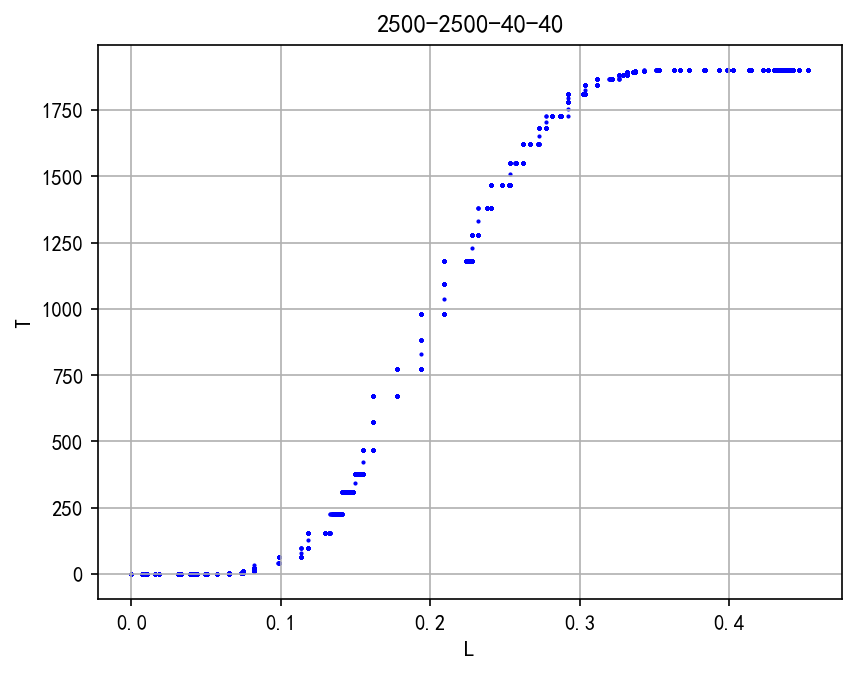

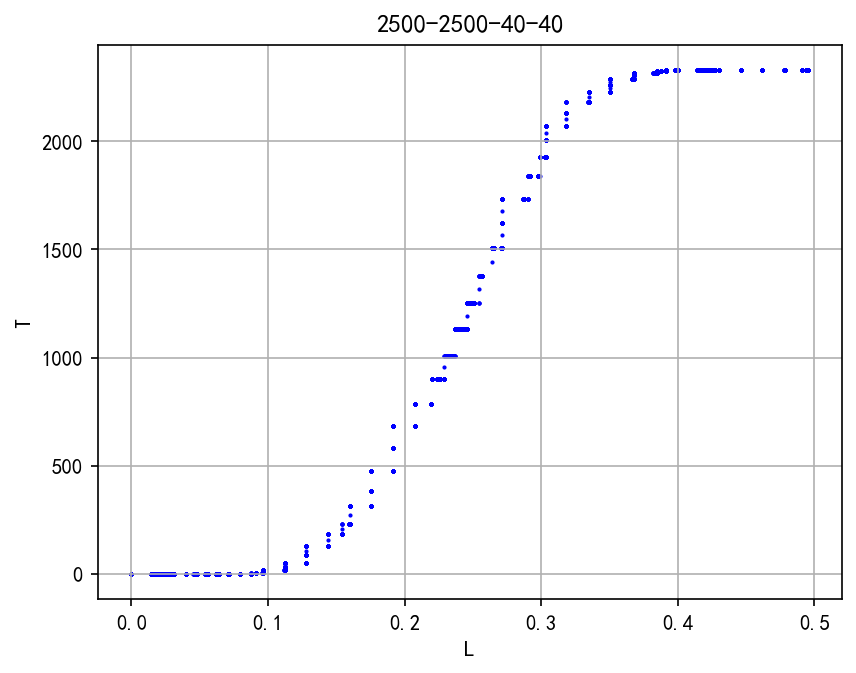

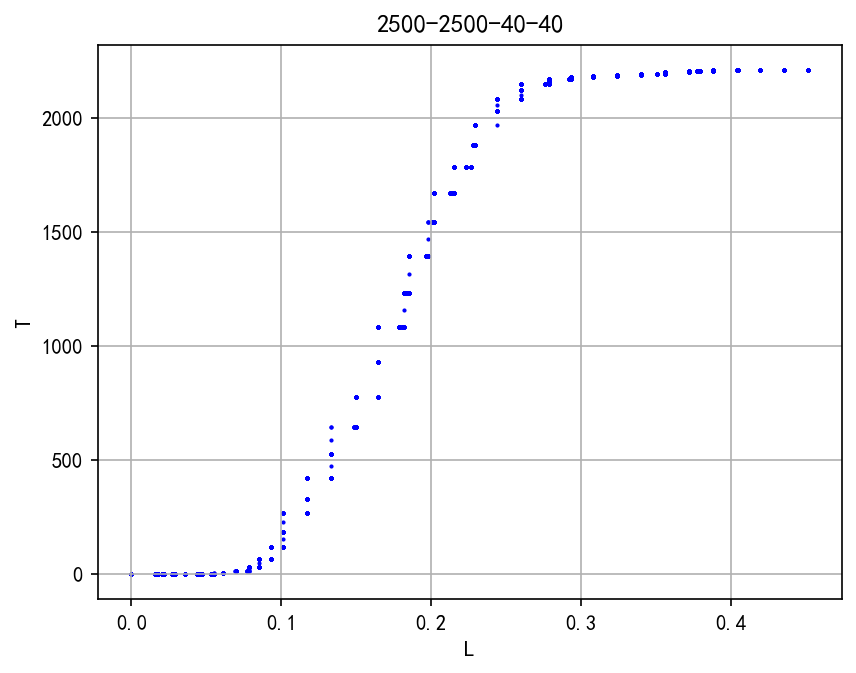

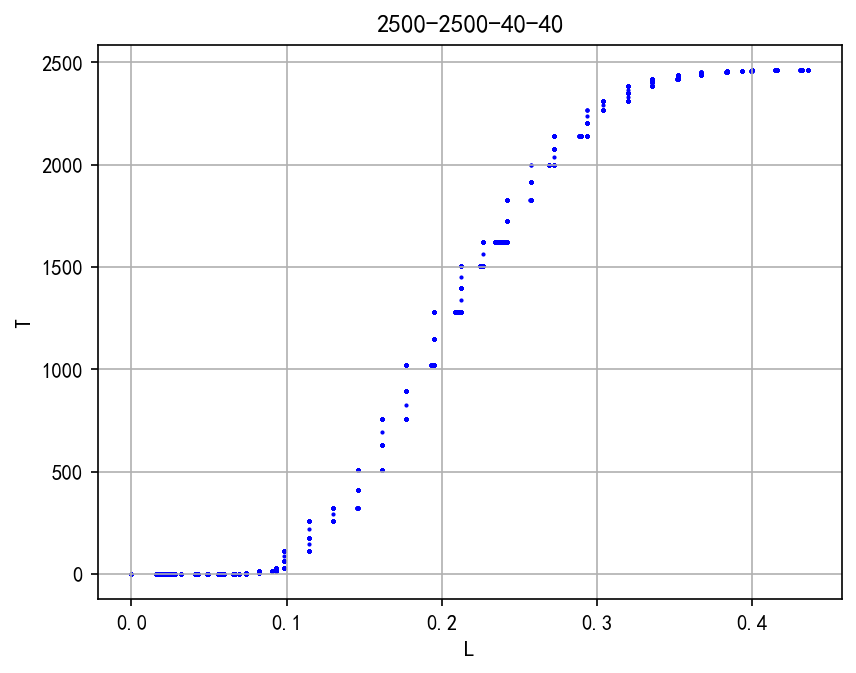

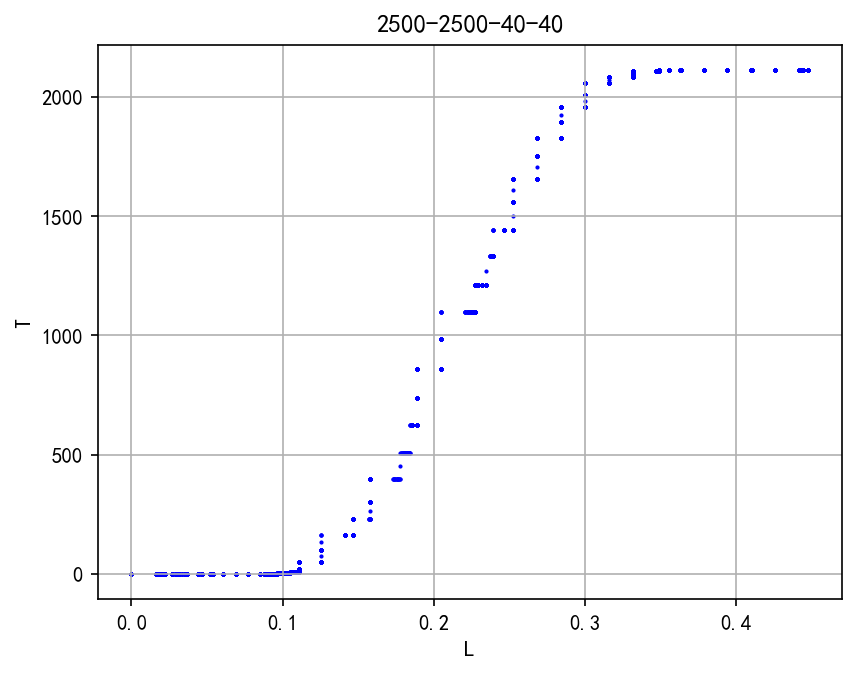

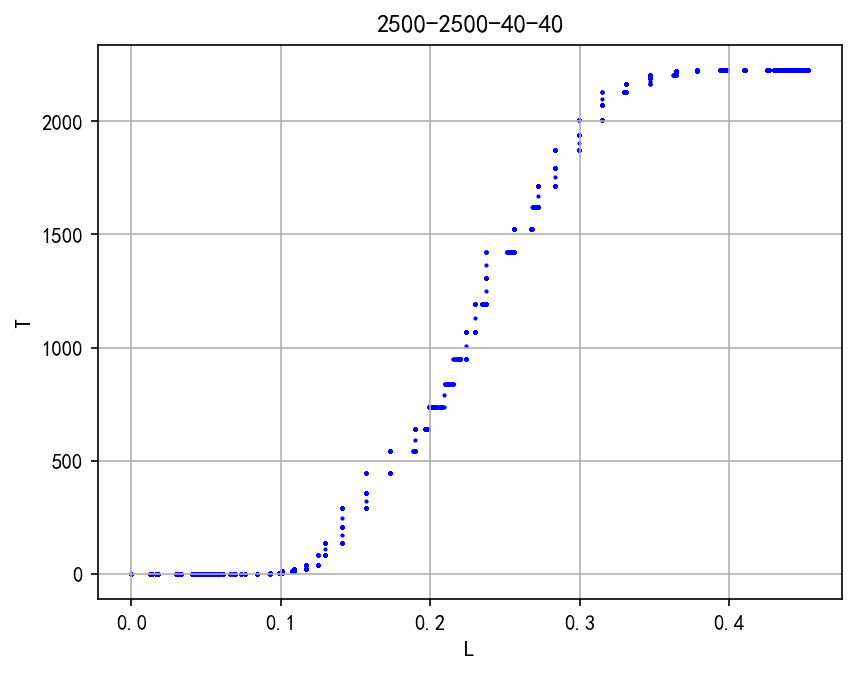

In [119]:
colors=[
    'red','orange','yellow','green','blue','purple','black',
]

for i in range(len(T)):
    plt.figure(dpi=150)
    plt.scatter(T[i],S[i], c='b', label='L', s=1)
    #plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
    plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
    plt.xlabel('L')
    plt.ylabel('T')
    #plt.legend()
    plt.grid()
    plt.show()